# Mimsy Data Exploration
and testing of config-driven local load function

In [ ]:
!pip install seaborn

In [95]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

from heritageconnector.utils import data_loaders

from urllib.parse import urlsplit
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
loader = data_loaders.local_loader()
data = loader.load_all()
cat_df = data['mimsy_catalogue']
people_df = data['mimsy_people']

Loaded data from local path: mimsy_catalogue, mimsy_people


## Data samples

In [4]:
len(people_df), len(cat_df)

(18095, 281899)

In [5]:
cat_df.sample(2)

,TITLE,ITEM_NAME,CATEGORY1,COLLECTOR,PLACE_COLLECTED,DATE_COLLECTED,PLACE_MADE,CULTURE,DATE_MADE,MATERIALS,MEASUREMENTS,EXTENT,DESCRIPTION,ITEM_COUNT,PARENT_KEY,BROADER_TEXT,WHOLE_PART,ARRANGEMENT,LANGUAGE_OF_MATERIAL,EDITION,OPTION1,OPTION2,OPTION3,OPTION4,OPTION5,OPTION6,OPTION7,OPTION8,OPTION9,OPTION10,OPTION11,OPTION12,OPTION13,OPTION14,OPTION15,CREATE_DATE,UPDATE_DATE
255306,Colliery ticket from Walton Co,miners token,SIM - Coal Mining,Lancashire Coal Mining Collection,NaN,NaN,NaN,NaN,NaN,metal; Colliery ticket.,NaN,NaN,"Colliery ticket from Walton Collieries, 1736",1.0,NaN,NaN,WHOLE,NaN,eng,NaN,NaN,NaN,"Baines, Sarah",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMG00244553,RECORD ACTIVE IN SEG DECANT,NaN,NaN,NaN,29-NOV-02,20-APR-20
275479,Auxillary driving weight from the free pendulum clock,weight-driven pendulum clock,SCM - Time Measurement,NaN,NaN,NaN,"Croydon, Croydon, Greater London, England, United Kingdom, England",NaN,1899,NaN,NaN,NaN,"Auxillary driving weight from the free pendulum clock, by R. J. Judd, Croydon, London, United Kingdom, 1899",1.0,522.0,1930-665,WHOLE,NaN,eng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-JAN-19,17-OCT-19


In [6]:
people_df.sample(2)

,LINK_ID,PREFERRED_NAME,TITLE_NAME,FIRSTMID_NAME,LASTSUFF_NAME,SUFFIX_NAME,HONORARY_SUFFIX,GENDER,BRIEF_BIO,DESCRIPTION,NOTE,BIRTH_DATE,BIRTH_PLACE,DEATH_DATE,DEATH_PLACE,CAUSE_OF_DEATH,NATIONALITY,OCCUPATION,WEBSITE,AFFILIATION,LINGUISTIC_GROUP,TYPE,REFERENCE_NUMBER,SOURCE,CREATE_DATE,UPDATE_DATE
3664,51487,"Follett, Sir David Henry",Sir,David Henry,Follett,NaN,NaN,M,Y,NaN,NaN,1907,NaN,1982,NaN,NaN,British,Museum Director,NaN,NaN,NaN,NaN,NaN,Y,21-APR-04,18-SEP-18
3467,46461,Automatic Water Boiler Company,NaN,NaN,Automatic Water Boiler Company,NaN,NaN,N,Y,TEASMADE INFO: http://www.teasmade.info/the-automatic-water-boiler-company/;\nhttp://www.teawaker.com/clarke.htm,"c.1902 - Frank Clarke is the head of the Automatic Water Boiler Company. 1902-1910 - they are located at 26a Corporation Street, Birmingham, England.",NaN,NaN,NaN,NaN,NaN,British,manufacturer,NaN,NaN,NaN,NaN,NaN,N,28-MAY-03,06-NOV-13


## URL Extraction

In [17]:
extract_domain_from_url("http://www.iwm.org.uk/collections/item/object/1030031461")

'iwm.org.uk'

In [22]:
def extract_urls_domains(mimsy_df, column="DESCRIPTION"):
    """
    Create dataframe of URLs from Mimsy collection
    """
    # extract urls
    url_match = "((?:https?:\/\/|www\.|https?:\/\/|www\.)[a-z0-9\.:].*?(?=[\s;]|$))"
    url_df = mimsy_df[column].str.extractall(url_match).rename(columns={0:'url'})
    
    # extract domains
    url_df['domain'] = url_df['url'].apply(extract_domain_from_url)
    
    return url_df

def extract_domain_from_url(url):
    """
    Extract domain from URL 
    """
    try:
        # if the url doesn't start with http, the main bit of the url ends up in path
        loc = urlsplit(url).netloc or urlsplit(url).path

        # remove www. and slug if present
        loc = re.sub("^www.", "", loc)
        loc = re.sub("/.*$", "", loc)

        return loc

    except:
        print(f"PARSING FAILED: {url}")
        return ""
    
url_df = extract_urls_domains(people_df)
url_df

PARSING FAILED: http://en.wiki[edia.org/wik/James_Tassie
PARSING FAILED: http://www.1911encyclopedia.org]


url  \
      match                                                                                                                                                  
1     0                                                                                           http://www.iwm.org.uk/collections/item/object/1030031461   
24    0                                                                                                           http://en.wikipedia.org/wiki/Holtzapffel   
      1                                                                                                    http://holtzapffel.org/register-of-lathes.html:   
25    0                                                                                                     www.wikipedia.org/wiki/British_Transport_Films   
28    0                                                                               http://americanhistory.si.edu/collections/search/object/nmah_1167521   
...                                                                                                                                                    ...   
18085 0                                                                                               https://en.wikipedia.org/wiki/William_Adolphus_Knell   
18088 0                                                                                                    https://en.wikipedia.org/wiki/Henry_A._Papprill   
18089 0                                                                                                          https://en.wikipedia.org/wiki/Rick_Genest   
18093 0                                                                            https://www.theguardian.com/science/2010/sep/22/rita-bronowski-obituary   
18094 0      https://www.independent.co.uk/news/obituaries/gritta-weil-editorial-secretary-who-devoted-her-life-to-the-observer-and-its-staff-1810571.html   

                             domain  
      match                          
1     0                  iwm.org.uk  
24    0            en.wikipedia.org  
      1             holtzapffel.org  
25    0               wikipedia.org  
28    0      americanhistory.si.edu  
...                             ...  
18085 0            en.wikipedia.org  
18088 0            en.wikipedia.org  
18089 0            en.wikipedia.org  
18093 0             theguardian.com  
18094 0           independent.co.uk  

[15054 rows x 2 columns]

In [23]:
domain_count = url_df['domain'].value_counts()
domain_count

en.wikipedia.org                                                                    2775
oxforddnb.com                                                                       1794
wck2.companieshouse.gov.uk                                                           342
getty.edu                                                                            330
gracesguide.co.uk                                                                    325
                                                                                    ... 
gemmary.com                                                                            1
keithholmes.net                                                                        1
search.connectinghistories.org.uk                                                      1
fact-index.com%2Fh%2Fhi%2Fhistory_of_anatomy_in_the_17th_and_18th_centuries.html       1
ayrshirehistory.com                                                                    1
Name: domain, Length:

In [106]:
filter_thresh = 50
domain_count_filtered = domain_count[domain_count >= filter_thresh]
domain_count_filtered = domain_count_filtered.append(pd.Series({"other": domain_count[domain_count<filter_thresh].sum()}))

In [107]:
domain_count_filtered

en.wikipedia.org                  2775
oxforddnb.com                     1794
wck2.companieshouse.gov.uk         342
getty.edu                          330
gracesguide.co.uk                  325
books.google.co.uk                 275
britannica.com                     229
nationalarchives.gov.uk            180
viaf.org                           157
historydb.adlerplanetarium.org     156
oxfordreference.com                154
npg.org.uk                         100
nobelprize.org                      99
camerapedia.org                     99
radiomuseum.org                     86
archive.org                         80
encyclopedia.jrank.org              79
adlerplanetarium.org                74
web.artprice.com                    73
de.wikipedia.org                    58
fr.wikipedia.org                    57
jstor.org                           53
steamindex.com                      52
thepotteries.org                    51
ncbi.nlm.nih.gov                    50
other                    

In [108]:
round(domain_count_filtered / domain_count_filtered.sum() * 100, 2)

en.wikipedia.org                  18.43
oxforddnb.com                     11.92
wck2.companieshouse.gov.uk         2.27
getty.edu                          2.19
gracesguide.co.uk                  2.16
books.google.co.uk                 1.83
britannica.com                     1.52
nationalarchives.gov.uk            1.20
viaf.org                           1.04
historydb.adlerplanetarium.org     1.04
oxfordreference.com                1.02
npg.org.uk                         0.66
nobelprize.org                     0.66
camerapedia.org                    0.66
radiomuseum.org                    0.57
archive.org                        0.53
encyclopedia.jrank.org             0.52
adlerplanetarium.org               0.49
web.artprice.com                   0.48
de.wikipedia.org                   0.39
fr.wikipedia.org                   0.38
jstor.org                          0.35
steamindex.com                     0.35
thepotteries.org                   0.34
ncbi.nlm.nih.gov                   0.33


## Create matrix to show distribution of URLs

In [109]:
people_url_df = extract_urls_domains(people_df)
cat_url_df = extract_urls_domains(cat_df)

PARSING FAILED: http://en.wiki[edia.org/wik/James_Tassie
PARSING FAILED: http://www.1911encyclopedia.org]


In [110]:
len(people_url_df), len(cat_url_df)

(15054, 10)

In [111]:
top_people_domains = domain_count_filtered.index.tolist()
top_people_domains.remove('other')

In [112]:
people_url_df = people_url_df.reset_index()
people_url_df_filtered = people_url_df[people_url_df['domain'].isin(top_people_domains)]
people_matrix = pd.DataFrame(0, index=top_people_domains, columns=people_df.index)

In [113]:
from tqdm import tqdm

for idx, row in tqdm(people_url_df_filtered.iterrows(), total=len(people_url_df_filtered)):
    people_matrix.loc[row['domain'], row['level_0']] += 1

100%|██████████| 7728/7728 [00:02<00:00, 2650.23it/s]


AttributeError: 'AxesSubplot' object has no attribute 'xgrid'

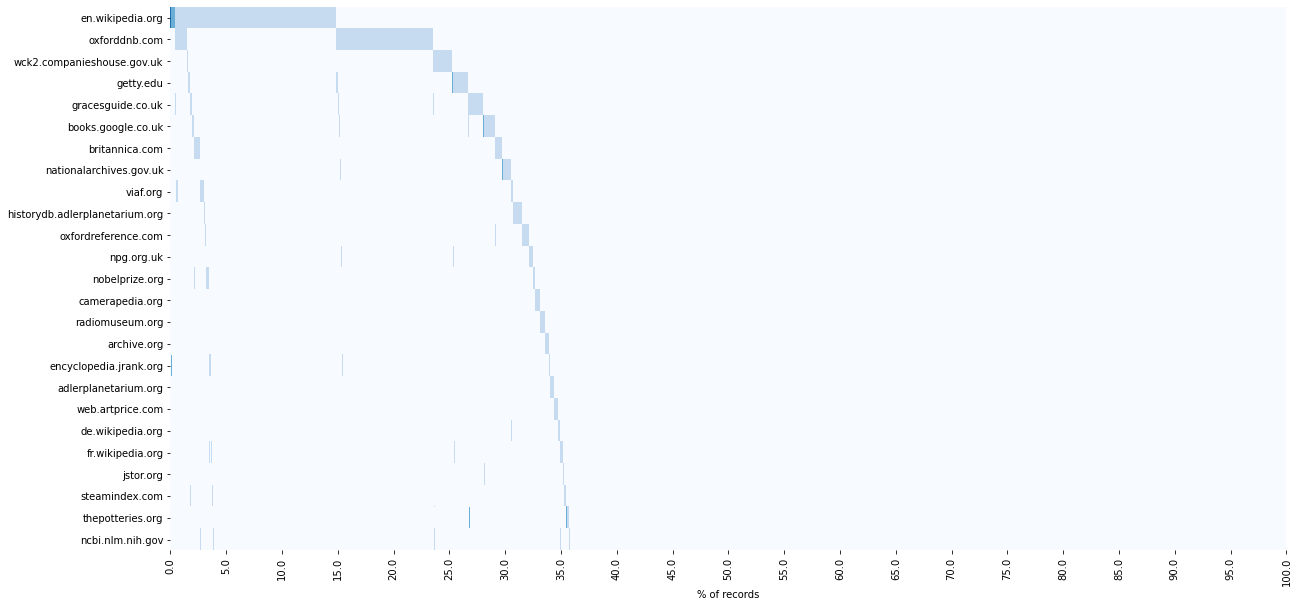

In [114]:
matrix_plot = people_matrix.sort_values(top_people_domains, axis=1, ascending=False)
f, ax = plt.subplots(figsize=(20, 10))
nticks = 21
ax = sns.heatmap(matrix_plot, cbar=False, cmap="Blues", xticklabels=np.linspace(0,100,nticks))
ax.set_xticks(np.linspace(0, people_matrix.shape[1]-1, nticks));
ax.set_xlabel("% of records")

## Inspect URLs of individual domains

In [127]:
domain = 'en.wikipedia.org'
people_url_df[(people_url_df['domain'] == domain)]

,level_0,match,url,domain
1,24,0,http://en.wikipedia.org/wiki/Holtzapffel,en.wikipedia.org
9,38,0,http://en.wikipedia.org/wiki/British_Aircraft_Corporation,en.wikipedia.org
16,43,1,http://en.wikipedia.org/wiki/Cooke_Optics,en.wikipedia.org
25,56,1,http://en.wikipedia.org/wiki/Eduard_J%C3%A4ger_von_Jaxtthal,en.wikipedia.org
28,57,0,http://en.wikipedia.org/wiki/Robert_Alexander_Hillingford,en.wikipedia.org
...,...,...,...,...
15047,18083,0,https://en.wikipedia.org/wiki/Vladimir_Vysotsky,en.wikipedia.org
15048,18084,0,https://en.wikipedia.org/wiki/Frederick_Guthrie,en.wikipedia.org
15049,18085,0,https://en.wikipedia.org/wiki/William_Adolphus_Knell,en.wikipedia.org
15050,18088,0,https://en.wikipedia.org/wiki/Henry_A._Papprill,en.wikipedia.org


In [130]:
people_df[people_df['DESCRIPTION'].astype(str).str.contains(domain)].head(5)

,LINK_ID,PREFERRED_NAME,TITLE_NAME,FIRSTMID_NAME,LASTSUFF_NAME,SUFFIX_NAME,HONORARY_SUFFIX,GENDER,BRIEF_BIO,DESCRIPTION,NOTE,BIRTH_DATE,BIRTH_PLACE,DEATH_DATE,DEATH_PLACE,CAUSE_OF_DEATH,NATIONALITY,OCCUPATION,WEBSITE,AFFILIATION,LINGUISTIC_GROUP,TYPE,REFERENCE_NUMBER,SOURCE,CREATE_DATE,UPDATE_DATE
24,10404,"Holtzapffel, Charles",NaN,Charles,Holtzapffel,NaN,NaN,M,Y,WIKI: http://en.wikipedia.org/wiki/Holtzapffel\nREF: http://holtzapffel.org/register-of-lathes.html:,"son of John Jacob Holtzapffel (1768-1835); \n1827 - joined Holtzapffel & Co, his father's firm, making tools and lathes for ornamental turning; \n1838 - published 'A New System of Scales of Equal Parts: Applicable to Various Purposes of Engineering, Architectural and General Science,' as well as the related 'List of Scales of Equal Parts.' ;\n1843 - 'Turning and Mechanical Manipulation.' Volume 1, ""Materials, Their Differences, Choice, and Preparation; Various Modes of Working Them, Generally Without Cutting Tools,' his father's work published;\n1846 - Volume 2, 'The Principles of Construction, Action and Application of Cutting Tools Used by Hand; And Also of Machines Derived from the Hand Tools,' published",1806,"London, Greater London, England, United Kingdom",1847,NaN,NaN,British,mechanical engineer; tool maker,NaN,NaN,NaN,NaN,NaN,N,01-FEB-98,24-JUN-11
38,1106,British Aircraft Corporation,NaN,NaN,British Aircraft Corporation,NaN,NaN,N,Y,"Gardner, Charles, 'British Aircraft Corporation: A history by Charles Gardner (B.T. Batsford Ltd, 1981), p.38; WIKI: http://en.wikipedia.org/wiki/British_Aircraft_Corporation","1960 - merger of English Electric Aviation Ltd., Vickers-Armstrong (Aircraft), the Bristol Aeroplane Company and Hunting Aircraft; 1977 - merged with Hawker Siddeley and Scottish Aviation to form British Aerospace",1960,United Kingdom,1977-04-29,United Kingdom,NaN,British,aircraft manufacturer,NaN,NaN,NaN,NaN,NaN,Y,17-JUN-96,10-APR-19
43,1130,"Taylor, Taylor and Hobson Limited",NaN,NaN,"Taylor, Taylor and Hobson Limited",NaN,NaN,N,Y,http://www.taylor-hobson.com/thethstorymod.htm\nWIKI: http://en.wikipedia.org/wiki/Cooke_Optics,"Founded in 1886 by brothers William and Thomas Smithies Taylor and W S H Hobson to manufacture lenses, most famously the Cooke camera lens; Bell & Howell took control of the company in 1930; sold to Rank in 1946; Cooke Optics Limited formed as a successor company in 1998 after a buy-out of the optical division of Taylor-Hobson",1886,"Leicester, England, United Kingdom",NaN,NaN,NaN,British,lens manufacturer,NaN,NaN,NaN,NaN,NaN,Y,18-JUN-96,15-MAR-18
56,11808,"Jaeger, Eduard",NaN,Eduard,Jaeger,NaN,NaN,M,Y,REF: http://fm.iowa.uiowa.edu/fmi/xsl/hardin/heirs/record_detail.xsl?-db=heirs&-lay=weblayout&HeirsNo=1977&-find\nWIKI: http://en.wikipedia.org/wiki/Eduard_J%C3%A4ger_von_Jaxtthal\nREF: http://www.aeiou.at/aeiou.encyclop.j/j072115.htm;internal&action=_setlanguage.action?LANGUAGE=en\nREF: http://beckerexhibits.wustl.edu/becker/records250.htm,"professor at the university of Vienna; used the ophthalmoscope for the determination of refractivity; made improvements to eye chart test types that were developed by Heinrich Kuechler; Ritter von Jaxtthal; published from 1844,",1818-06-25,"Vienna, Wien, Austria",1884-07-05,"Vienna, Wien, Austria",NaN,Austrian,ophthalmologist,NaN,NaN,NaN,NaN,NaN,N,18-FEB-98,01-MAR-16
57,11809,"Hillingford, Robert Alexander",NaN,Robert Alexander,Hillingford,NaN,NaN,M,Y,WIKI: http://en.wikipedia.org/wiki/Robert_Alexander_Hillingford\nVIAF: https://viaf.org/viaf/54100158/,"specialized in historical pictures, often military scenes",1828-0-28,"London, Greater London, England, United Kingdom",1904,NaN,NaN,British,artist; painter,NaN,NaN,NaN,NaN,NaN,N,18-FEB-98,06-JUL-16


In [126]:
people_df.loc[14299]

LINK_ID                                                                                                                                                                                                                                                                                  68131
PREFERRED_NAME                                                                                                                                                                                                                                                                           Aruna
TITLE_NAME                                                                                                                                                                                                                                                                                 NaN
FIRSTMID_NAME                                                                                                                              